## Problem statement: Concrete Strength Prediction

## Objective

To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.


### Resources Available

The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/ . The same has been shared along with the course content.

### Attribute information

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

#### Name -- Data Type -- Measurement -- Description

1. Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
2. Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
3. Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
4. Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
5. Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
6. Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
7. Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
8. Age(age) -- quantitative -- Day (1~365) -- Input Variable
9. Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

## GitHub repository URL

## https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-SubratMuruni.git

##  Deliverable – 1: Exploratory data quality report reflecting the following:

In [360]:
# Import all essential python libraries

import numpy as np # Importing Numpy
import pandas as pd # Importing Pandas
import scipy.stats as stats # Importing Scipy for statistical operations
import matplotlib.pyplot as plt # Importing Matplotlib
import seaborn as sns # Importing Seaborn
sns.set(color_codes = True) # setting the background of the visualization graph
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

### 1.1. Univariate analysis (10 marks)
<br>
Univariate analysis – data types and description of the independent attributes which should include 
<br>

1. name, meaning, range of values observed
2. central values (mean and median), standard deviation and quartiles
3. analysis of the body of distributions / tails, missing values, outliers

<font color='brown'><b>1.1.1 General characteristic of the dataset</b></font>

In [94]:
# read the dataset into a dataframe 

dfConcrete =  pd.read_csv(
    '/Users/subratmuruni/desktop/Data Science/Projects_Assignments/Project_dataset/concrete.csv')

In [95]:
# read the first 5 rows of the dataset

dfConcrete.head() # strength is the dependent variable and needs to be predicted 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [96]:
# read the last 5 rows of the dataset

dfConcrete.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [97]:
# find the rows and columns of the dataframe

dfConcrete.shape # dataset has 1030 rows and 9 columns

(1030, 9)

In [98]:
# columns of the dataset

dfConcrete.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [99]:
# information of the dataset with regards to columns, count and datatype

dfConcrete.info() # indicates 8 columns with float datatype and 1 column with int datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<font color='brown'><b>1.1.2 Datatype, Central Value, IQR, standard Deviation</b></font>

In [100]:
# datatype of the columns of the dataset

dfConcrete.dtypes # there are 8 columns which are float and 1 column which is int

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [101]:
# find the mean of the columns of the dataset

dfConcrete.mean() # provides mean of the continuous variables

cement          281.167864
slag             73.895825
ash              54.188350
water           181.567282
superplastic      6.204660
coarseagg       972.918932
fineagg         773.580485
age              45.662136
strength         35.817961
dtype: float64

In [102]:
# find the median of the columns of the dataset

dfConcrete.median() # provides median of the continuous variables

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

In [103]:
# find the mode of the columns of the dataset

dfConcrete.mode() # provides mode of the continuous and categorical variables

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,362.6,0.0,0.0,192.0,0.0,932.0,594.0,28.0,33.4
1,425.0,NaN,NaN,NaN,NaN,NaN,755.8,NaN,NaN


In [104]:
# find the standard deviation of the continuous variables

dfConcrete.std()

cement          104.506364
slag             86.279342
ash              63.997004
water            21.354219
superplastic      5.973841
coarseagg        77.753954
fineagg          80.175980
age              63.169912
strength         16.705742
dtype: float64

In [105]:
# find interquartile range of the dataset
Q1 = dfConcrete.quantile(0.25)
Q3 = dfConcrete.quantile(0.75)
IQR = Q3 - Q1
IQR # gives the IQR of continuous variables

cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64

In [29]:
# describe the summary of the dataframe

dfConcrete.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


<font color='brown'><b>1.1.3 Missing values, Null values and incorrect imputation </b></font>

In [31]:
# check the missing values/null in the dataset

dfConcrete.isnull().sum() # there are no missing values and null values in the dataset

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [33]:
# find null values in the dataset

dfConcrete.isnull().any() # all columns indicate false which means no missing values

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

In [34]:
# check for values that are NaN/NA

dfConcrete.isna().sum() # there are no values as Na or NaN

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [35]:
# find NaN/NA or improper values in the dataset 

dfConcrete.isna().any() # false indicates no Na or NaN values in the dataset

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

In [36]:
# find duplicates in the dataset

dfConcrete.duplicated().sum() # there are 25 duplicated rows in the dataset with all columns duplicate

# the duplicate rows need to be dropped. 

25

In [39]:
# find whether all values in columns are real or not

dfConcrete[~dfConcrete.applymap(np.isreal).all(1)] # results show that all are real values


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [40]:
# find the unique values of variables 

dfConcrete.nunique() # indicates that there are a lot of discrete values in the columns

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [42]:
# check the skewness of the continuous variables

dfConcrete.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [82]:
# find pattern/commonality based on strength

dfConcrete['strength'].value_counts().sort_values(ascending=False)

33.40    6
79.30    4
41.05    4
71.30    4
35.30    4
        ..
59.30    1
52.83    1
15.58    1
46.93    1
45.90    1
Name: strength, Length: 845, dtype: int64

<font color='brown'><b>1.1.4 Univariate Analysis: Histogram plots for the variables in the dataframe </b></font>

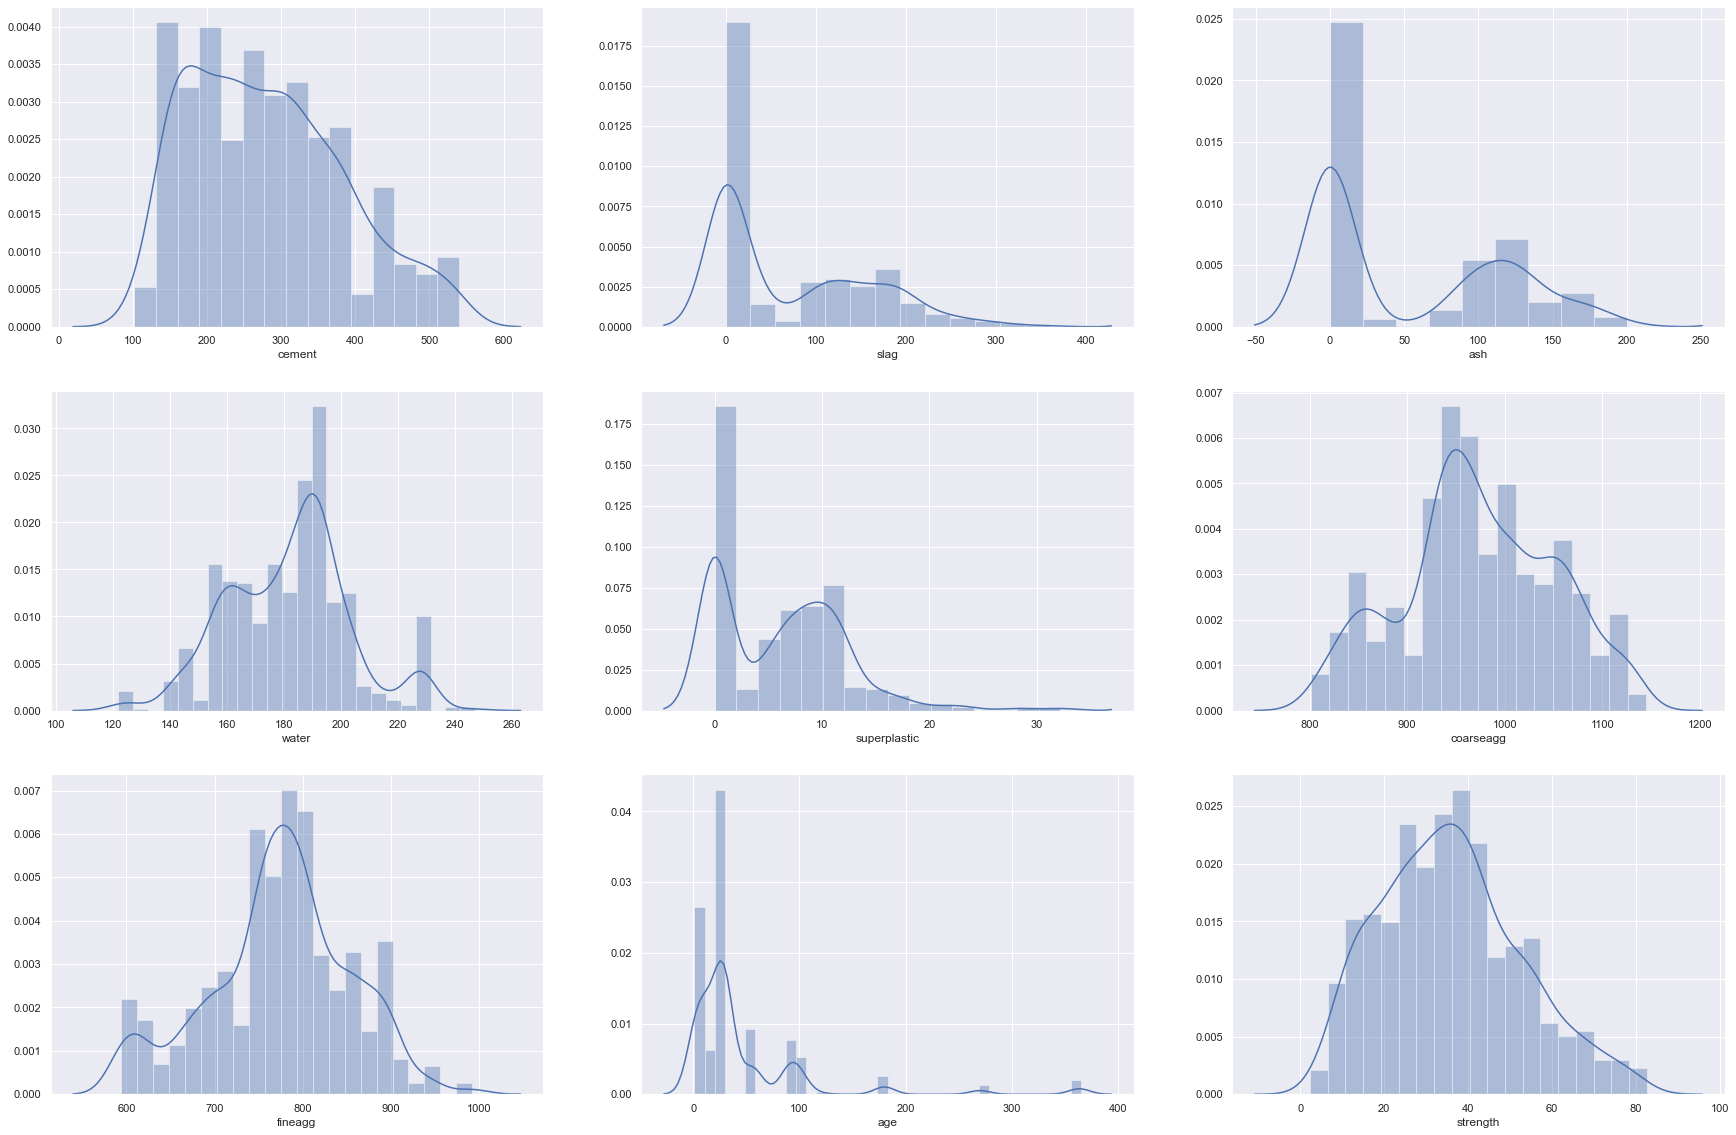

In [67]:
# plot distplot for the continuous variables

plt.figure(figsize=(30,20))
pos = 1
columns = dfConcrete.columns

for i in columns:
    plt.subplot(3,3,pos)
    sns.distplot(dfConcrete[i],kde=True)
    # plt.legend().remove()
    pos += 1
plt.show();

<font color='brown'><b>1.1.5 Univariate Analysis: Box plots for the variables in the dataframe </b></font>

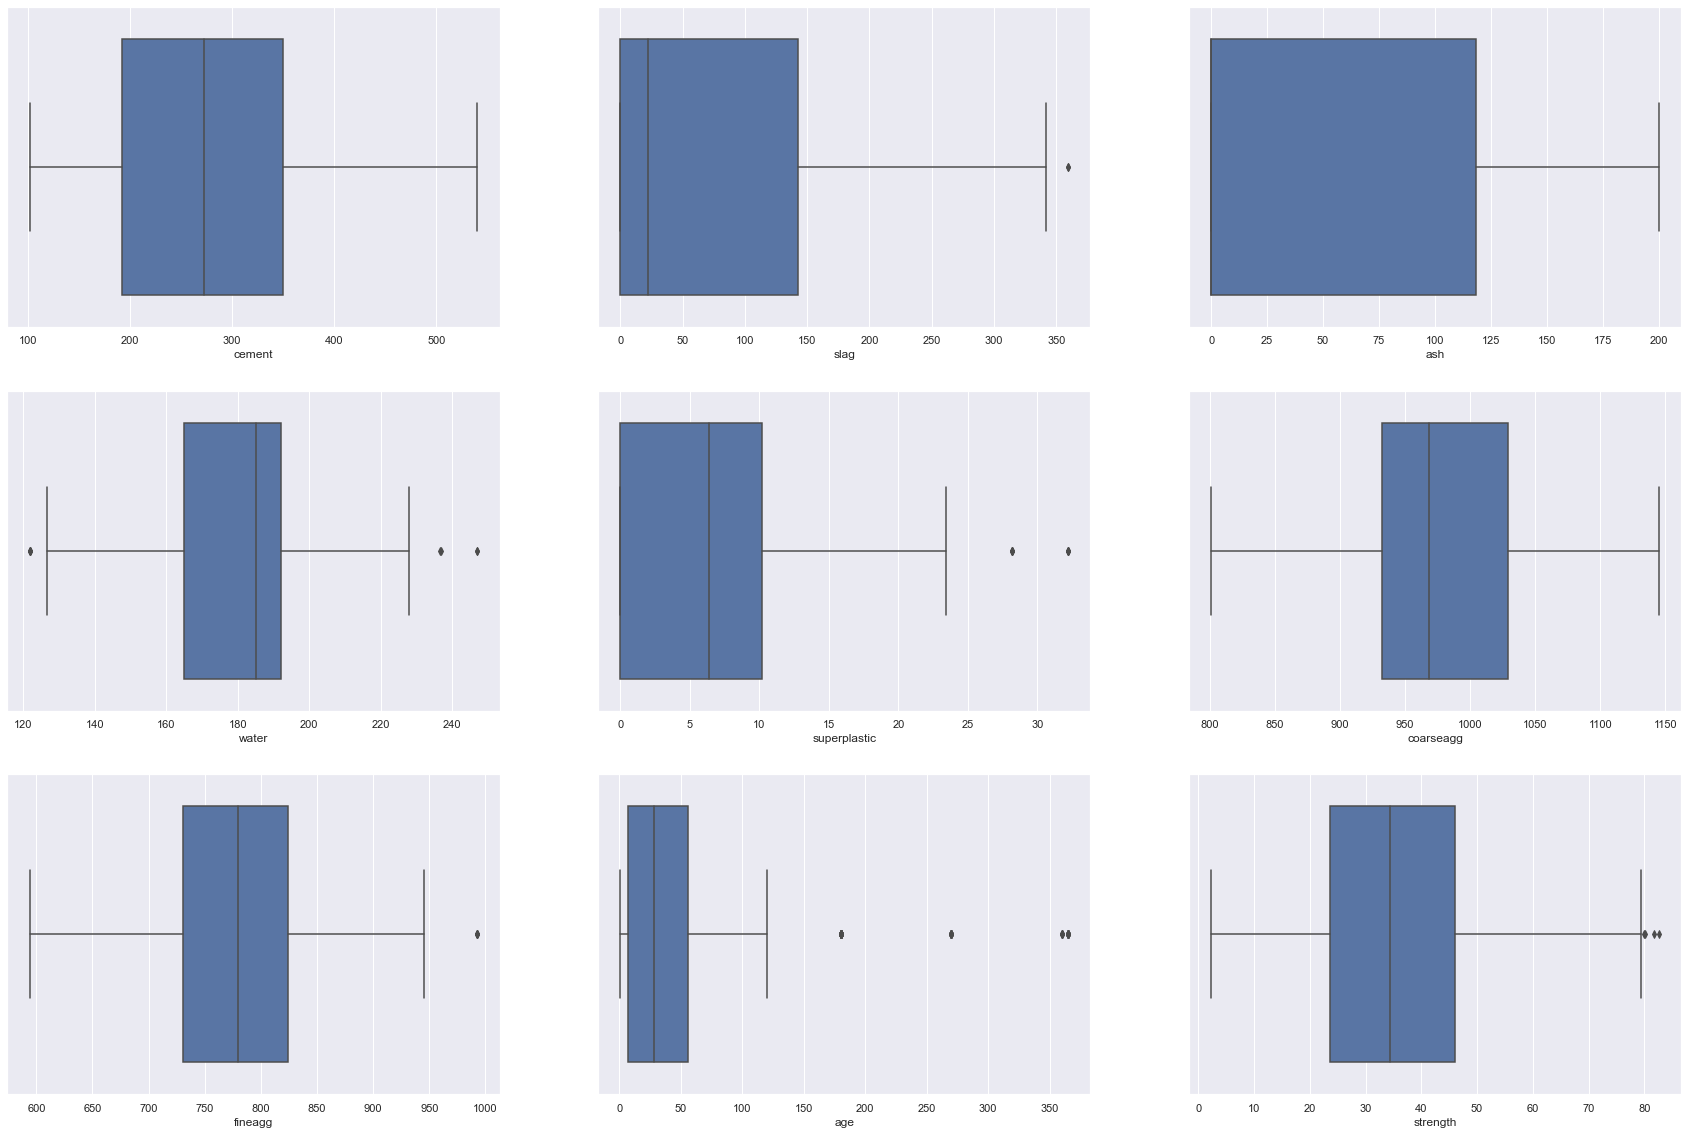

In [78]:
# plot boxplot for the continuous variables

plt.figure(figsize=(30,20))
pos = 1
columns = dfConcrete.columns

for i in columns:
    plt.subplot(3,3,pos)
    sns.boxplot(x = dfConcrete[i])
    # plt.legend().remove()
    pos += 1
plt.show();

### <font color='brown'>1.1.6 Univariate analysis insight from plots and observations</font>

<font color='blue'>
    
1. All columns have continuous variables
2. The data type present are mostly float and int
3. There is a scale difference in the spread of data in the dataset. Scaling will be done on the dataset. 
4. There are no missing values or NaN and also, all values are real values. No imputation strategy will be implemented for treating missing values. 
5. There are 25 duplicate rows in the dataset. As a best practice, these duplicate rows of data will be dropped. 
6. Trying to find the unique values in the dataset shows that, there are a lot of discrete values in the dataset for each feature and doesn't provide us with any pattern for analysis. 
7. Doing a value count of 'strength' column doesn't show us any significant pattern. 
8. Plotting the the histogram of the independent variables indicates that the dataset is skewed with majority being positively skewed. The presence of multiple peaks and valleys in the data distribution could mean mixing of Gaussians and needs further analysis on how the data was collected. <b><u>(This is out of scope for this analysis)</u></b>
9. Only strength column shows somewhat of a normal distribution which is the target or dependent variable. 
10. The box plot of independent variables indicate that there are outliers in the dataset. For an effective ML model, we need to treat the outliers before feeding the data into the ML model. 
11. Observing that the outliers are relatively close to the whiskers for most variables, it may be a good idea to implement capping to treat the outliers. 


### 1.2. Multivariate analysis (10 marks)
<br>
Bi-variate analysis between the predictor variables and between the predictor variables and target column. 
<br>
Comment on your findings in terms of their relationship and degree of relation if any. 
<br>
Visualize the analysis using boxplots and pair plots, histograms or density curves. 


<font color='brown'><b>1.2.1 Dependent variable vs Independent variables</b></font>

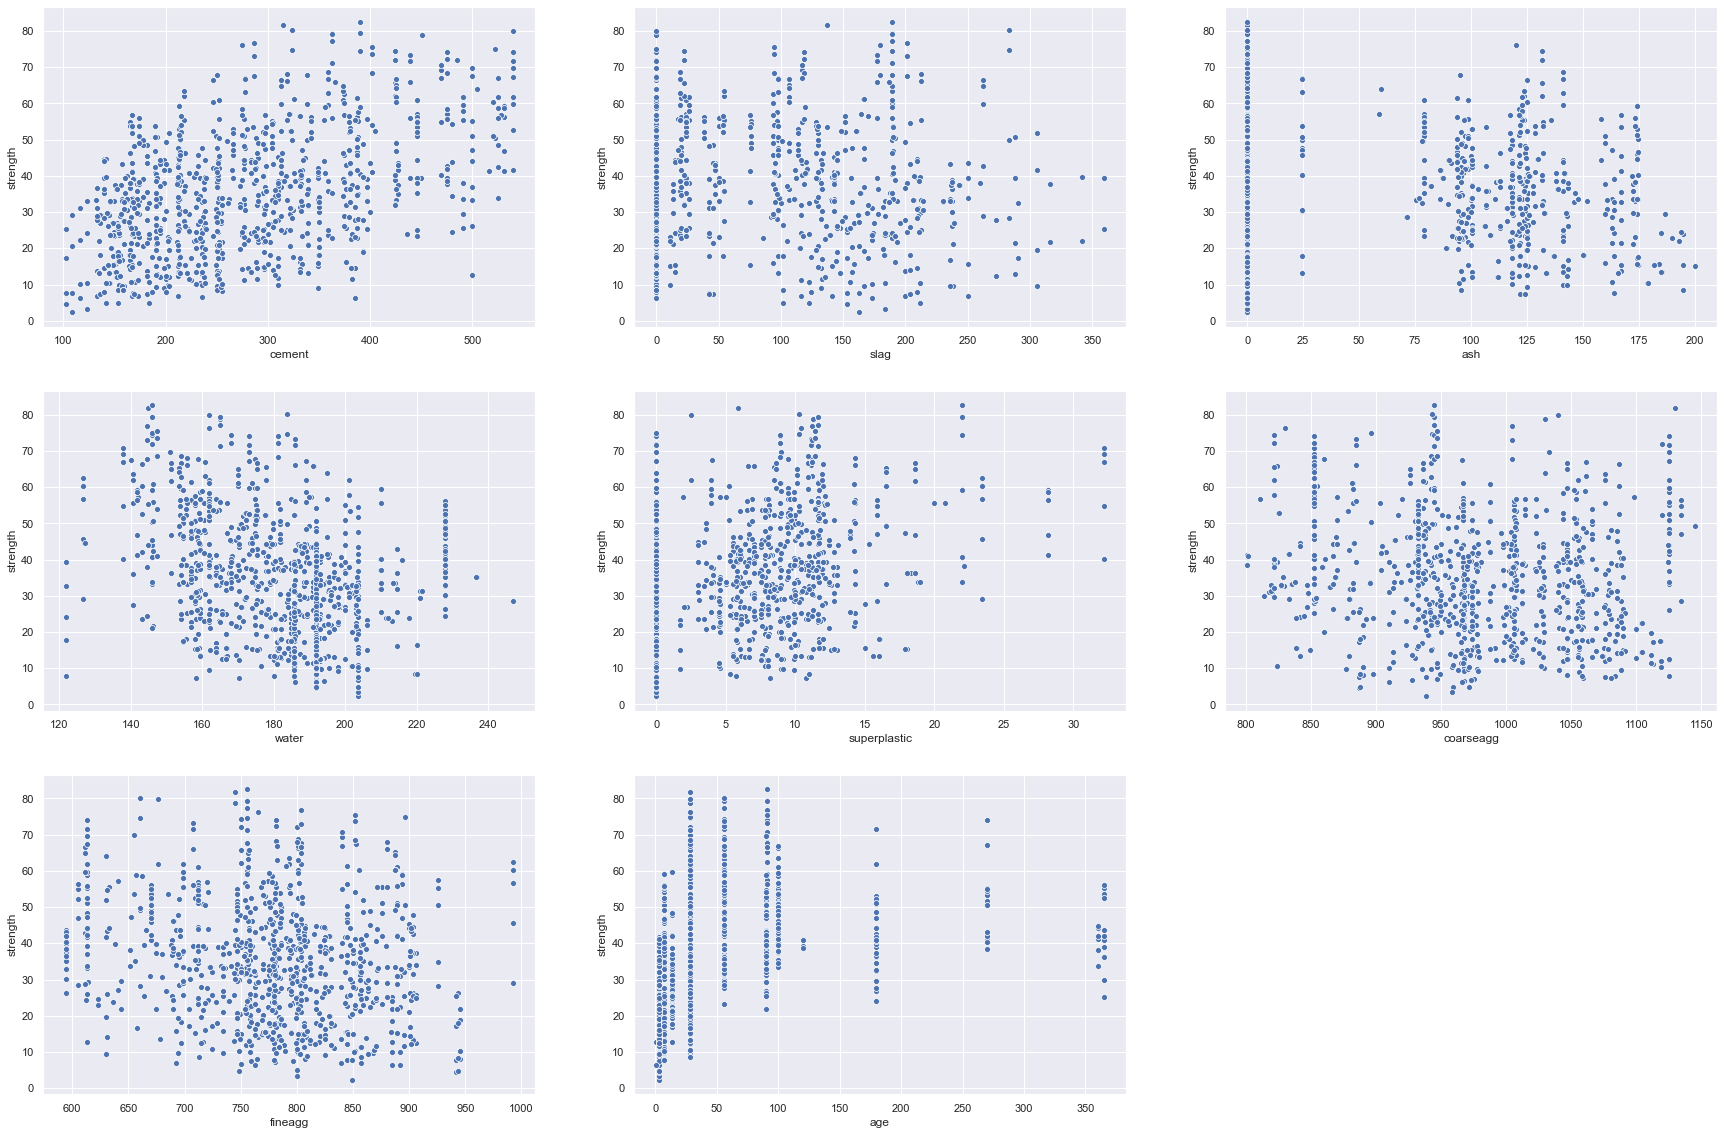

In [76]:
# plot scatterplot between the independent variables and dependent variable

plt.figure(figsize=(30,20))
pos = 1
columns = ['cement', 'slag', 
           'ash', 'water', 
           'superplastic', 'coarseagg',
           'fineagg', 'age']

for i in columns:
    plt.subplot(3,3,pos)
    sns.scatterplot(dfConcrete[i],dfConcrete['strength'])
    # plt.legend().remove()
    pos += 1
plt.show();

<font color='brown'><b>1.2.2 Dependent variable <font color='blue'>(50 as Strength Threshold)</font> vs Independent variables</b></font>

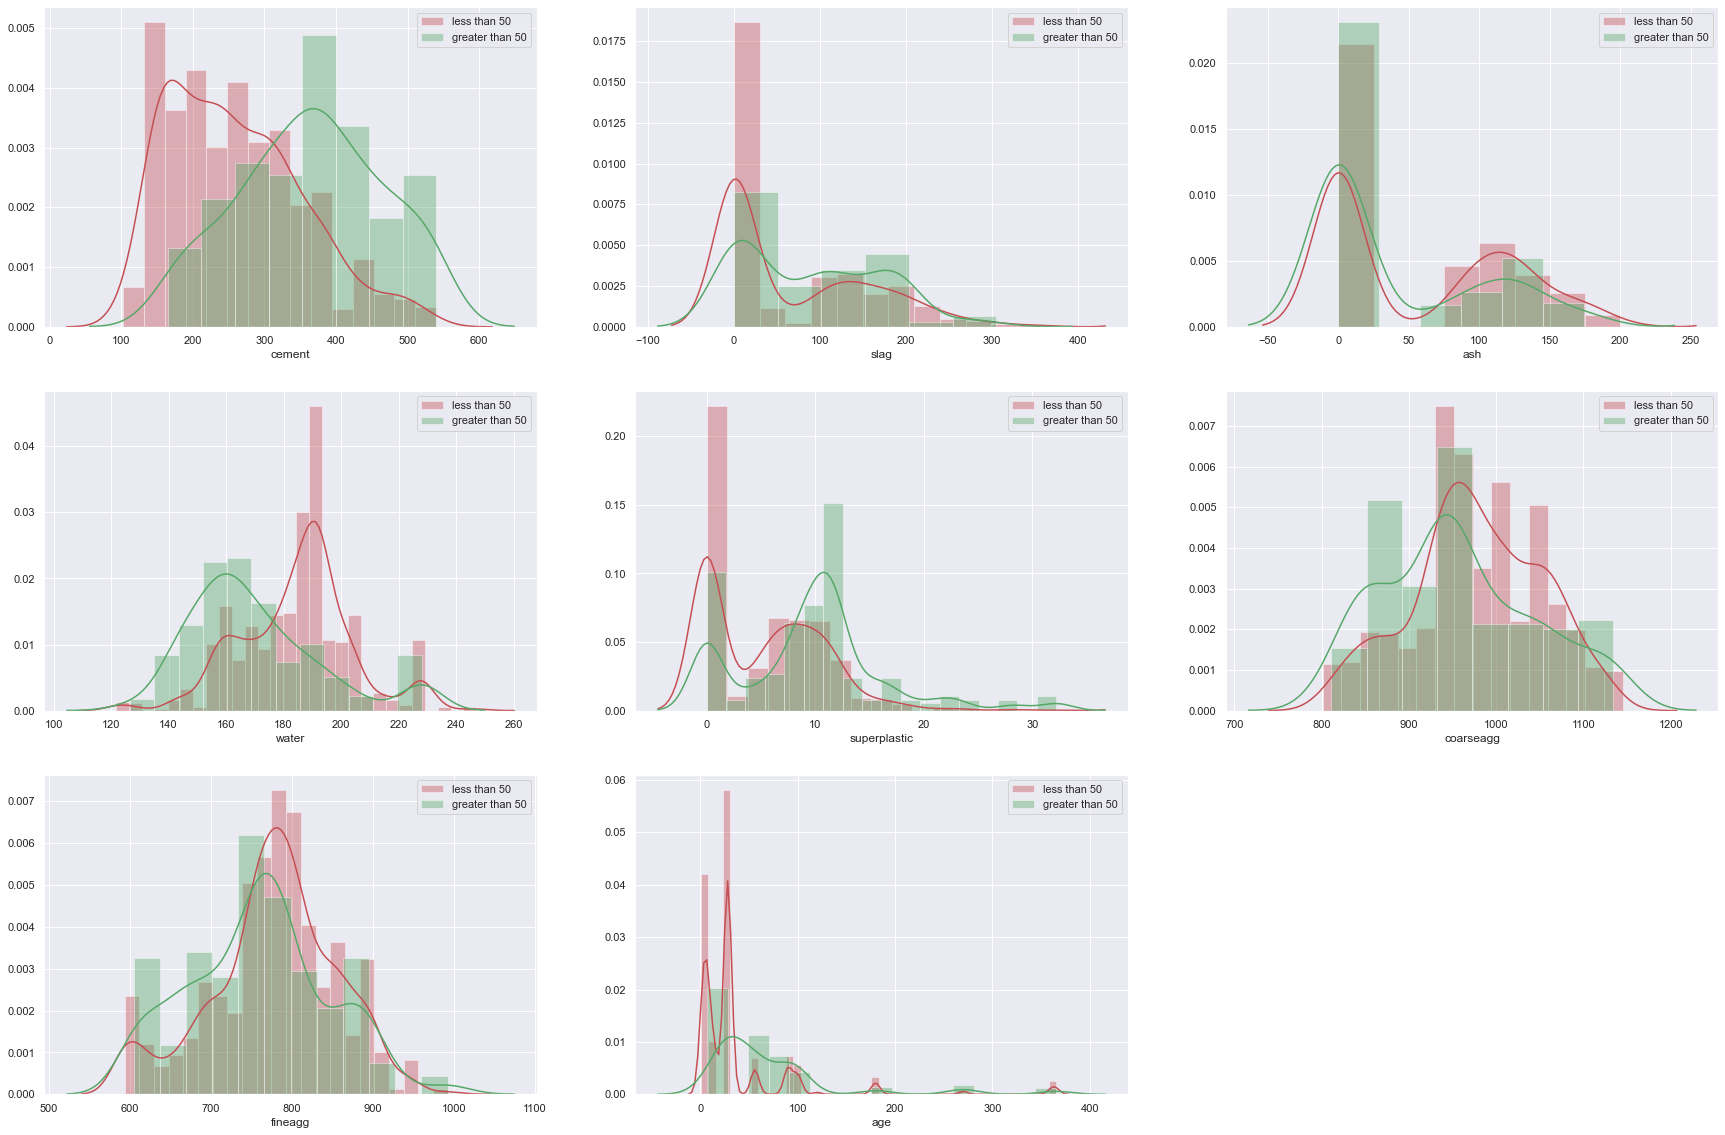

In [72]:
# histogram between the independent variables and dependent variable

plt.figure(figsize=(30,20))
pos = 1
columns = ['cement', 'slag', 
           'ash', 'water', 
           'superplastic', 'coarseagg',
           'fineagg', 'age']

for i in columns:
    plt.subplot(3,3,pos)
    sns.distplot(dfConcrete[dfConcrete['strength']< 50][i],color='r', label= 'less than 50')
    sns.distplot(dfConcrete[dfConcrete['strength']> 50][i],color='g', label= 'greater than 50')
    plt.legend()
    # plt.legend().remove()
    pos += 1
plt.show();


<font color='brown'><b>1.2.3 Correlation Matrix of the variables</b></font>

In [57]:
# correlation between attributes

corr = dfConcrete.corr() # assigning variable corr as the correlation function output

corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<font color='brown'><b>1.2.4 Heatmap between variables</b></font>

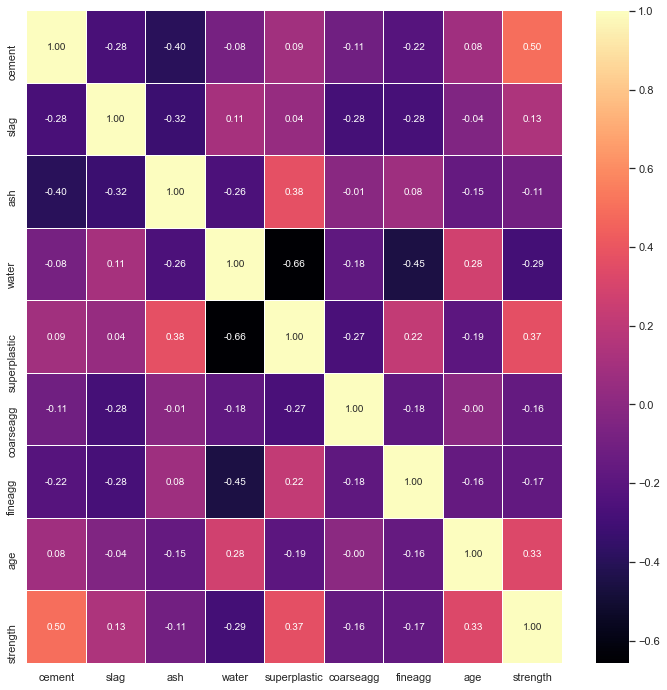

In [108]:
# plot heatmap for the correlation between variables

plt.figure(figsize=(12,12))

sns.heatmap(corr, annot=True, linewidth=0.05, fmt='0.2f',cmap ='magma');
plt.show()

<font color='brown'><b>1.2.5 Pair plot between variables</b></font>

<Figure size 1440x1440 with 0 Axes>

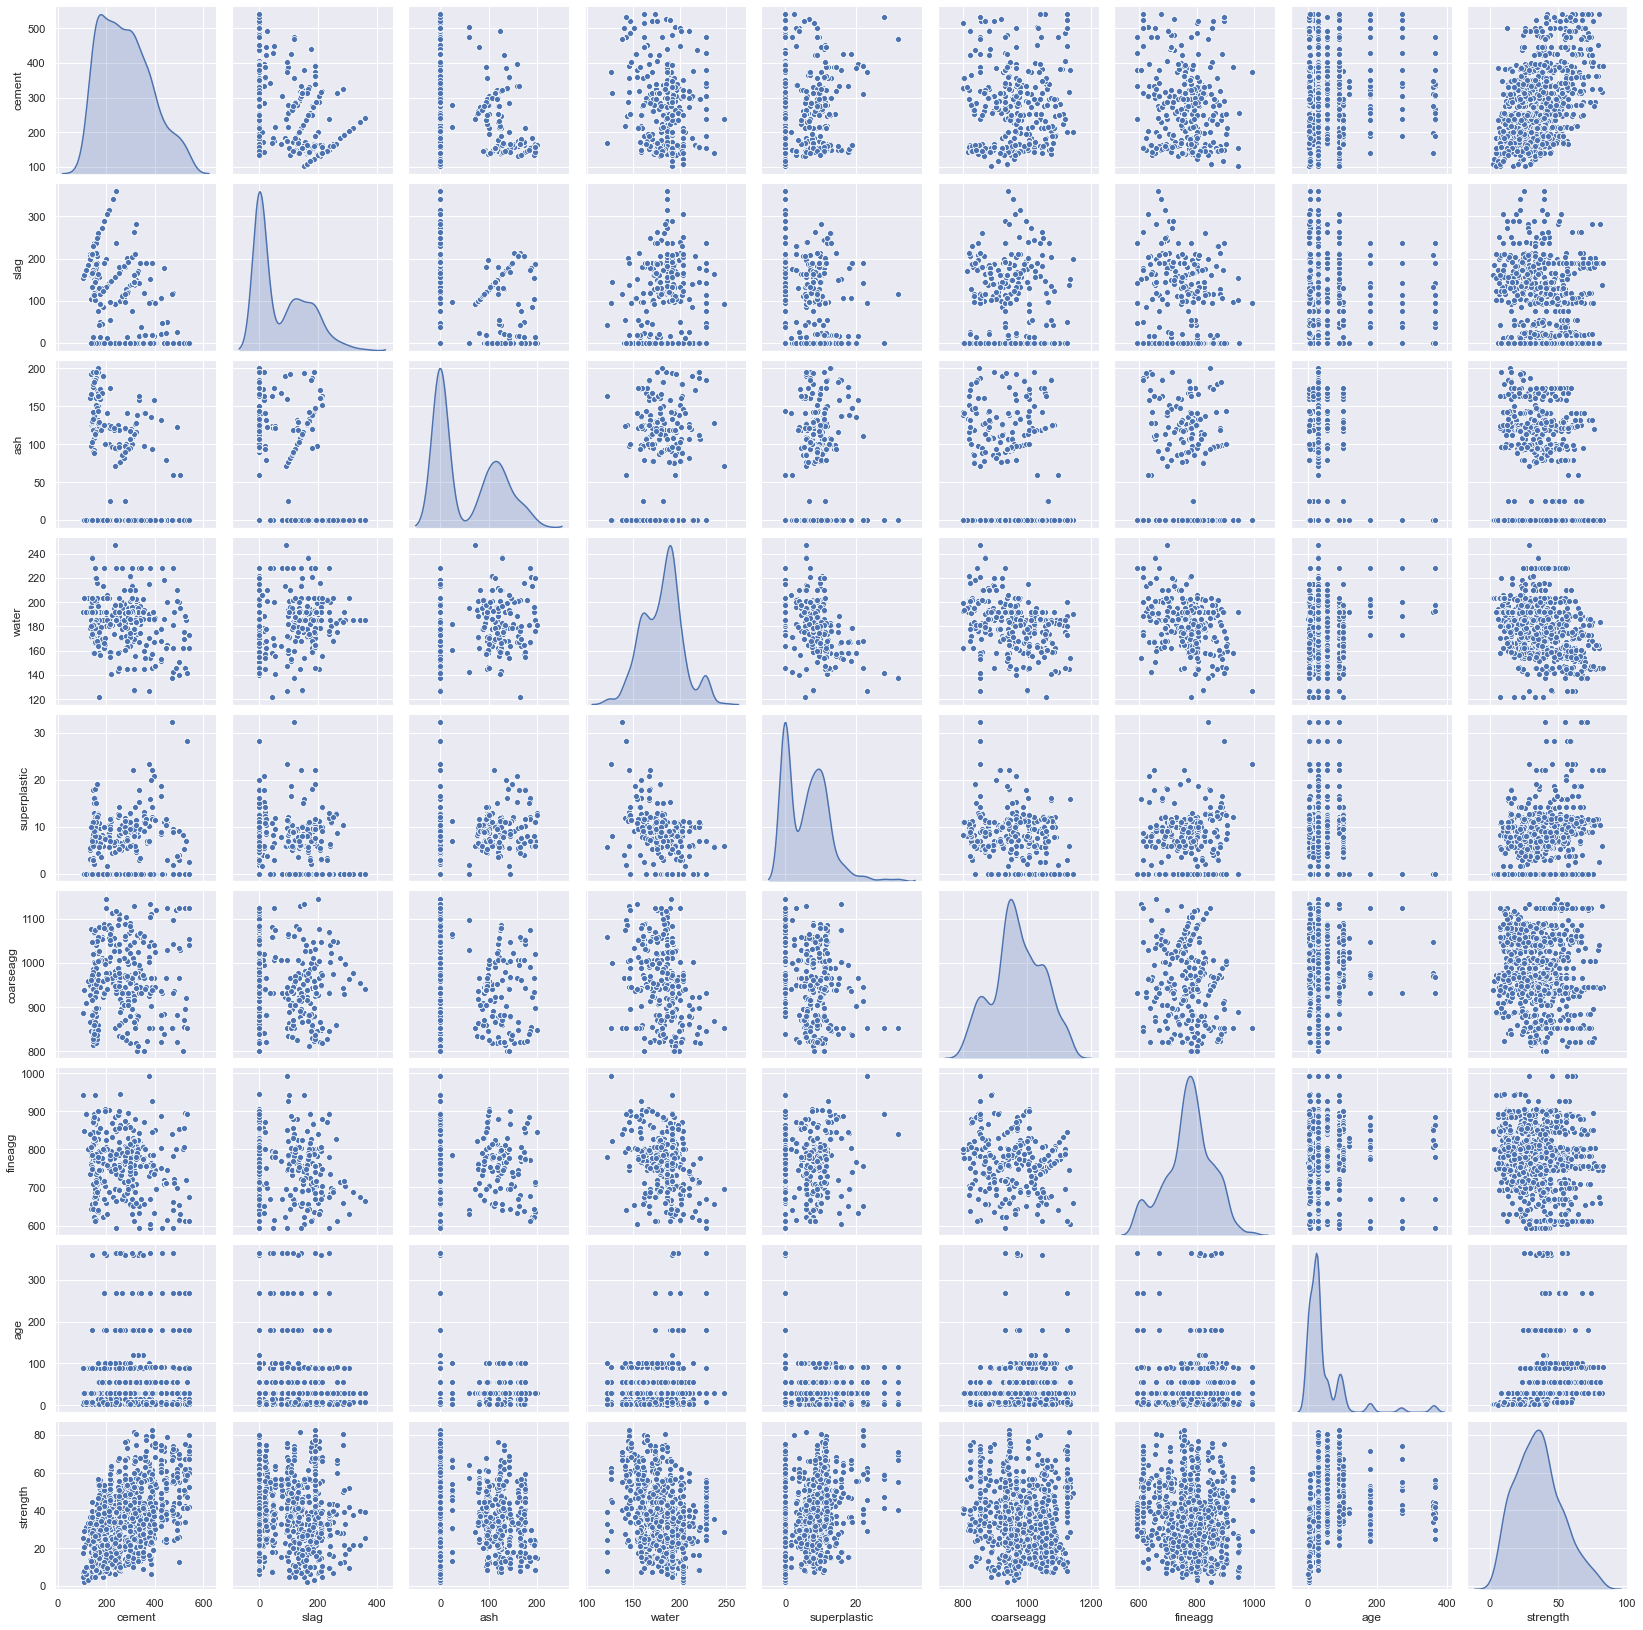

In [56]:
# plot the pairplot between variables with diagonal as KDE

plt.figure(figsize=(20,20))
sns.pairplot(dfConcrete, diag_kind='kde')
plt.show();

### <font color='brown'>1.2.6 Multivariate analysis insight from plots</font>

<font color='blue'>

1. Strength and cement show positive (+ve) linear association
2. Strength and water show negative (-ve) linear association
3. Strength and superplastic show a slight positive(+ve) linear association
4. Rest of the independent variables don't show any linear association with strength
5. Plotting the histogram between the dependent variables and the independent variable (Strength), shows some interesting trends:
    <br>
    <br>
       a. Strength consistently increases with increase in cement quantity
    <br>
       b. Slag versus strength shows that strength is usually low when the slag is less but there is increase in strength as the slag increases. 
    <br>
       c. <b>Ash versus strength doesn't show a great deal of trend.</b>
    <br>
       <font color='red'>Feature engineering may indicate if this attribute adds value to the model or not</font>
    <br>
       d. Water versus Strength indicates that lower water quantity increases strength and with increase in water quantity the strength decreases. 
    <br>
       e. Superplastic increase mostly contributes to increase in concrete strength but not always.
    <br>
       f. <b>Coarseagg and Fineagg don't show any relevant trend with the strength of the concrete</b>
    <br>
       g. Most observations with low age show lower concrete strength
    <br>
    <br>
6. From the heat map and pair plot, Water and superplastic show higher negative(-ve) correlation 
    <br>
7. From the heat map and pair plot, water and fineagg show negative(-ve) correlation

### 1.3. Feature Engineering Techniques (10 marks)
<br>

1. Identify opportunities (if any) to extract a new feature from existing features,drop a feature (if required)
2. Get data model ready and do a train test split.
3. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.

### <font color='brown'>1.3.1 Feature selection, feature engineering</font>

##### Steps for creating the optimized data model for predicting the strength of concrete

<font color='blue'>
<br>
    
1. There are no missing and NaN values in the dataset. So, no imputation or missing value treatment will be done. 
2. Drop the 25 duplicate rows from the main dataset
3. Divide the dataset into <u><b>Train and Test sets</b></u> for computation in the ratio of <u><b>70:30</b></u> respectively
4. As we are going to use K-Fold CV for validation and GridSearchCV or RandomizedSearchCV for hyperparameter tuning, we will not divide the dataset into a validation set
5. As regression models are influenced by outliers we will treat outliers in the columns slag,water, superplastic,fineagg and age in the initial dataset. 
6. Scale the data and check if normalization can improve skewness of the dataset
<br>
<font color='red'> Scaling,Outlier Treatment and Normalization will be done individually on the Train and Test sets to prevent data leak </font>
7. Train the linear model and calculate the R2 score
8. Train a polynomial model
9. Do feature selection using Lasso regression and Recursive Feature elimination
10. Train the linear model after feature selection and engineering
11. Create a Dataframe for storing the scores

<font color='brown'><b>1.3.1.1 Drop duplicate rows in the dataframe</b></font>

In [118]:
# keep the Analytics base table (ABT) as it is and copy it in a new dataframe

dfConcrete_1 = dfConcrete.copy()

dfConcrete_1.shape # the new dataframe has 1030 rows and 9 columns

(1030, 9)

In [119]:
# drop the 25 duplicate rows identified in the univariate analysis

dfConcrete_1.drop_duplicates(inplace=True)

dfConcrete_1.shape # the resulting dataframe has 1005 rows and 9 columns

(1005, 9)

<font color='brown'><b>1.3.1.2 Divide the data into train and test in 70:30</b></font>

In [120]:
# import the train_test_split function from scikit-learn

from sklearn.model_selection import train_test_split

# dividing the data set in to dependent and independent variables
# all independent variables
X = dfConcrete_1.drop(['strength'],axis=1)

# Strength column which is dependent variable
y = dfConcrete_1[['strength']]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((703, 8), (302, 8), (703, 1), (302, 1))

###  Train data

#### <font  color= 'brown'> Treating outliers for train data using IQR

In [121]:
# since a majority of the outliers are close to the whiskes, cap them with whiskers as the range

# finding interquartile range of the dataset
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3- Q1
IQR # gives the IQR of continuous variables

# find variables which are ouside the wishkers of the IQR
np.where((X_train < (Q1- 1.5*IQR)) | (X_train > (Q3 + 1.5*IQR)))

# copy the original train dataframe into a new dataframe for treating outliers
X_train_outlier = X_train.copy()

# replace every outlier on the lower side by the lower whisker
for i,j in zip(np.where(X_train_outlier < Q1 - 1.5*IQR)[0],np.where(X_train_outlier < Q1 - 1.5*IQR)[1]):
    whisker = Q1 - 1.5*IQR
    X_train_outlier.iloc[i,j] = whisker[j]
    
# replace every outlier on the upper side by the upper whisker
for i,j in zip(np.where(X_train_outlier > Q3 + 1.5*IQR)[0],np.where(X_train_outlier > Q3 + 1.5*IQR)[1]):
    whisker = Q3 + 1.5*IQR
    X_train_outlier.iloc[i,j] = whisker[j]

#### <font  color= 'brown'> Scaling train data

In [122]:
# use standardscaler function from scikit-learn to scale the train data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler

# fit the dataset to the standardscalar function
X_train_scaled = pd.DataFrame(std_scaler.fit_transform(X_train_outlier), 
                              columns = X_train.columns)

# print the resulting dataframe
X_train_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-0.849741,-0.863253,1.074136,-0.752703,0.676987,1.380314,0.395299,0.495810
1,-0.808273,-0.863253,0.693200,-0.800380,0.252278,0.429923,1.741648,0.495810
2,-1.278554,-0.863253,1.203685,-0.075693,0.889342,0.077781,0.553841,-0.301732
3,-1.326618,1.034798,1.112692,2.285500,-0.048558,-1.373987,-1.407802,-0.301732
4,-0.808273,-0.863253,0.693200,-0.581067,0.252278,0.319961,1.690059,0.495810


#### <font  color= 'brown'> Naming final train dataset

In [123]:
# copy the resulting dataframe after outlier treatment and scaling to a new set for ease of usage.

Xtrain = X_train_scaled.copy() # dependent variable dataframe for train data
ytrain = y_train.copy() # independent variable dataframe for train data

Xtrain.shape, ytrain.shape

((703, 8), (703, 1))

###  Test data

#### <font  color= 'brown'> Treating outliers for test data

In [124]:
# since a majority of the outliers are close to the whiskes, cap them with whiskers as the range

# finding interquartile range of the dataset
Q1 = X_test.quantile(0.25)
Q3 = X_test.quantile(0.75)
IQR = Q3- Q1
IQR # gives the IQR of continuous variables

# find variables which are ouside the wishkers of the IQR
np.where((X_test < (Q1- 1.5*IQR)) | (X_test > (Q3 + 1.5*IQR)))

# copy the original test dataframe into a new dataframe for treating outliers
X_test_outlier = X_test.copy()

# replace every outlier on the lower side by the lower whisker
for i,j in zip(np.where(X_test_outlier < Q1 - 1.5*IQR)[0],np.where(X_test_outlier < Q1 - 1.5*IQR)[1]):
    whisker = Q1 - 1.5*IQR
    X_test_outlier.iloc[i,j] = whisker[j]
    
# replace every outlier on the upper side by the upper whisker
for i,j in zip(np.where(X_test_outlier > Q3 + 1.5*IQR)[0],np.where(X_test_outlier > Q3 + 1.5*IQR)[1]):
    whisker = Q3 + 1.5*IQR
    X_test_outlier.iloc[i,j] = whisker[j]

#### <font  color= 'brown'> Scaling for test data

In [125]:
# use standardscaler function from scikit-learn to scale the test data
std_scaler = StandardScaler()
std_scaler

# fit the dataset to the standardscalar function
X_test_scaled = pd.DataFrame(std_scaler.fit_transform(X_test_outlier), 
                              columns = X_train.columns)

# print the resulting dataframe
X_test_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,2.010134,0.622316,-0.886514,-0.013667,0.533379,-1.549855,-0.040058,-0.014913
1,0.216741,-0.779231,-0.886514,0.216123,-0.980951,1.419256,-0.196371,-1.102028
2,1.144496,0.366310,-0.886514,-1.101650,1.077857,-1.549855,1.763170,1.434573
3,0.445173,1.727745,-0.886514,-1.204821,1.452186,-1.549855,1.196692,-1.309097
4,-0.810202,2.644413,-0.886514,0.202054,-0.980951,0.273546,-1.005447,-0.014913


#### <font  color= 'brown'> Naming final test dataset

In [126]:
# copy the resulting dataframe after outlier treatment and scaling to a new set for ease of usage.

Xtest = X_test_scaled.copy() # dependent variable dataframe for test data
ytest = y_test.copy() # independent variable dataframe for test data

Xtest.shape, ytest.shape

((302, 8), (302, 1))

### <font color='brown'>1.3.2 Data Model</font>

In [127]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((703, 8), (703, 1), (302, 8), (302, 1))

#### <font color='blue'> The Xtrain, ytrain, Xtest, ytest data will be used for model training and testing. 
#### <font color='blue'>The Xtrain, ytrain set will be used for K-Fold CV, GridSearchCV and RandomizedSearchCV

### <font color='brown'>1.3.3 Linear Regression Model</font>

#### <font  color= 'brown'>1.3.3.1 Train the linear regression model

In [374]:
# build the linear regresssion model and train the model

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain) # train linear regression model

print('Linear Regression R2 on train data:',lin_reg.score(Xtrain,ytrain)*100.0) # find the R2 of train data
print()
print('Linear Regression R2 on test data:',lin_reg.score(Xtest,ytest)*100.0) # find the R2 on test data

Linear Regression R2 on train data: 74.2439847451609

Linear Regression R2 on test data: 73.98235978976807


In [142]:
# check the coefficients of the independent variables after training the model

for idx, col_name in enumerate(Xtrain.columns):
    print("The coefficient for {} is {}".format(col_name, lin_reg.coef_[0][idx]))

The coefficient for cement is 12.499065603138208
The coefficient for slag is 8.33402793014296
The coefficient for ash is 4.922352998747372
The coefficient for water is -3.694461488426995
The coefficient for superplastic is 1.3313145601785006
The coefficient for coarseagg is 0.5552570690368678
The coefficient for fineagg is 1.1045363965623622
The coefficient for age is 9.101594229803379


#### <font  color= 'brown'>1.3.3.2 Make prediction on test data

In [131]:
# import regression metrics for finding the model performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predict = lin_reg.predict(Xtest) # predict the independent variable using test data

#### <font  color= 'brown'>1.3.3.3 Calculate the performance metrics of the model

In [375]:
# calculate the performance metrics of the linear regression model

MAE = mean_absolute_error(ytest,predict)
MSE = mean_squared_error(ytest,predict)
RMSE = np.sqrt(mean_squared_error(ytest,predict))
rSQD = r2_score(ytest,predict)*100.0

In [376]:
# print the performance metrics of the linear regression model

print('Mean Absolute Error on test data:', MAE)
print()
print('Mean Squared Error on test data:', MSE)
print()
print('Root Means Squared error on test data',RMSE)
print()
print('R-Square on test data:',rSQD)

Mean Absolute Error on test data: 5.9796726345333795

Mean Squared Error on test data: 60.458818329276916

Root Means Squared error on test data 7.7755268843517555

R-Square on test data: 73.98235978976807


#### <font  color= 'brown'>1.3.3.4 Add the performance metrics in a dataframe

In [377]:
# capture the performance metrics in a dataframe

metrics_linear = pd.DataFrame({'Model':['Linear Regression'],'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'R2':rSQD})

metrics_linear

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,5.979673,60.458818,7.775527,73.98236


### <font color='brown'>1.3.4 Model of higher degrees (Polynomial model with interaction terms)</font>

#### <font  color= 'brown'>1.3.4.1 Train the polynomial model

In [379]:
# import the polynomialfeatures from scikit-learn to add interaction terms for model of higher degree

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,interaction_only=True) # quadratic model
X_train2 = poly.fit_transform(Xtrain) # transform train set
X_test2 = poly.fit_transform(Xtest) # transform test set

poly_clf = LinearRegression()
poly_clf.fit(X_train2, y_train)

LinearRegression()

In [380]:
# find the shape of train and test data after transformation

X_train2.shape, X_test2.shape # additional 29 features get added to the dataset. 

((703, 37), (302, 37))

In [381]:
# check the coefficients of variables

poly_clf.coef_

array([[-3.51113471e-16,  1.35796645e+01,  9.91433310e+00,
         5.15063608e+00, -2.37900243e+00,  2.79648993e+00,
         8.62701189e-01,  1.95454329e+00,  9.95962762e+00,
         9.59228666e-01,  1.57682424e+00, -3.02734285e+00,
        -1.30389837e+00,  3.17276386e-01,  8.15112273e-01,
         2.11702611e+00,  1.97622576e+00, -1.69245045e+00,
         2.99620434e-01, -6.44163188e-02,  1.94875886e+00,
         3.73568414e+00, -2.27439529e+00, -1.57423850e+00,
         4.60895193e-01,  1.66315316e+00,  3.00313800e+00,
         2.13202765e+00, -1.34192861e+00, -1.28275493e-01,
         2.99088896e-01,  1.42391194e+00,  1.25807183e+00,
        -1.74827439e-01,  8.98535205e-01,  6.31846453e-01,
         1.96626361e+00]])

#### <font  color= 'brown'>1.3.4.2 Make predictions on test data

In [382]:
# make prediction of the polynomial model on test data

predict_poly = poly_clf.predict(X_test2)

In [383]:
# compare the performance of the model on train data and test data

print('R2 of train data:',poly_clf.score(X_train2,y_train)*100.0)
print()
print('R2 of test data:', poly_clf.score(X_test2, y_test)*100.0)

R2 of train data: 80.63280890735528

R2 of test data: 77.05042272508553


#### <font  color= 'brown'>1.3.4.3 Calculate the performance metrics of the model

In [387]:
# calculate the performance metrics of the polynomial model

MAE = mean_absolute_error(y_test,predict_poly)
MSE = mean_squared_error(y_test,predict_poly)
RMSE = np.sqrt(mean_squared_error(y_test,predict_poly))
rSQD = r2_score(y_test,predict_poly)*100.0

In [388]:
# print the performance metrics of the polynomial model

print('Mean Absolute Error on test data:', MAE)
print()
print('Mean Squared Error on test data:', MSE)
print()
print('Root Means Squared error on test data',RMSE)
print()
print('R-Square on test data:',rSQD)

Mean Absolute Error on test data: 5.656287191339293

Mean Squared Error on test data: 53.329368535586646

Root Means Squared error on test data 7.302695977211885

R-Square on test data: 77.05042272508553


#### <font  color= 'brown'>1.3.4.4 Add the performance metrics in a datafram

In [389]:
# capture the performance metrics in a dataframe

metrics_polynomial = pd.DataFrame({'Model':['Polynomial Model'],'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'R2':rSQD})

metrics_polynomial

,Model,MAE,MSE,RMSE,R2
0,Polynomial Model,5.656287,53.329369,7.302696,77.050423


#### <font  color= 'brown'>1.3.4.5 Combine the Performance metrics dataframe in a single dataframe

In [390]:
# combine the two dataframes to produce a single metrics evaluation dataframe

dfModelComparison = pd.concat([metrics_linear,metrics_polynomial])

dfModelComparison

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,5.979673,60.458818,7.775527,73.982360
0,Polynomial Model,5.656287,53.329369,7.302696,77.050423


### <font color='brown'>1.3.6 Feature selection and Feature Engineering</font>

<font color='brown'><b>1.3.6.1 Lasso regression for feature selection</b></font>

In [144]:
# build and train the lasso linear regression model

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(Xtrain,ytrain) # train the lasso model on train data
lasso.score(Xtrain,ytrain) # R2 on train data

0.6976510637624036

In [183]:
# print the coefficients of the independent variables for the model

for idx, col_name in enumerate(Xtrain.columns):
    print("The coefficient for {} is {}".format(col_name, lasso.coef_[idx]))

The coefficient for cement is 7.851093104762227
The coefficient for slag is 3.6333334808965696
The coefficient for ash is 0.0
The coefficient for water is -2.982613625273477
The coefficient for superplastic is 3.1209813352141964
The coefficient for coarseagg is -0.0
The coefficient for fineagg is -0.24770683041413202
The coefficient for age is 7.617703322852132


In [391]:
# print the R2 of the model on tran data and test data

print('The R2 of model on train data:',lasso.score(Xtrain,ytrain)*100.0)
print()
print('The R2 of model on test data:',lasso.score(Xtest,ytest)*100.0)

The R2 of model on train data: 69.76510637624035

The R2 of model on test data: 70.50193786102508


<font color='brown'><b>1.3.6.2 Recursive feature elimination</b></font>

In [171]:
# import the recursive feature elimination cross validation function to find the importance of features

from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
# from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42) # build the random forest regressor model

rfecv = RFECV(estimator=rfr, step=1, cv=KFold(10), scoring='r2') # divide the train data into 10 folds for CV
rfecv.fit(Xtrain, ytrain) # train the RFECV model on train data

RFECV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestRegressor(random_state=42), scoring='r2')

In [186]:
# print the optimum features predicted by the model

print('Optimal number of Feautures: {}'.format(rfecv.n_features_))

Optimal number of Feautures: 8


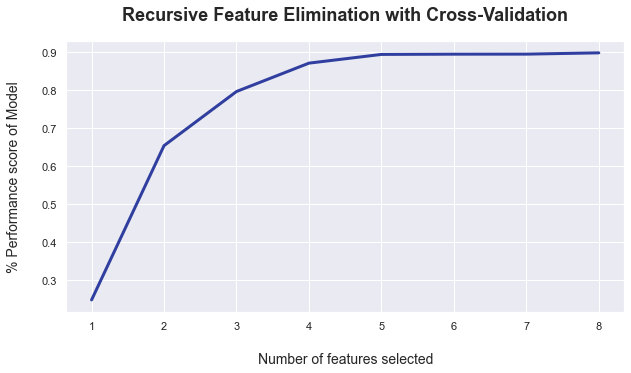

In [187]:
# plot the number of optimal features predicted by the model vs performance of the model

plt.figure(figsize=(10,5))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Performance score of Model', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [176]:
# find which features the model predicts to drop

X.columns[np.where(rfecv.support_ == False)[0]]

Index([], dtype='object')

In [392]:
# compare the performance metrics score of the model on train data and test data. 

print('Training Score:', rfecv.score(Xtrain,ytrain)*100.0)
print()
print('Test Score:',rfecv.score(Xtest,ytest)*100.0)

Training Score: 98.3074227280599

Test Score: 83.95657782030625


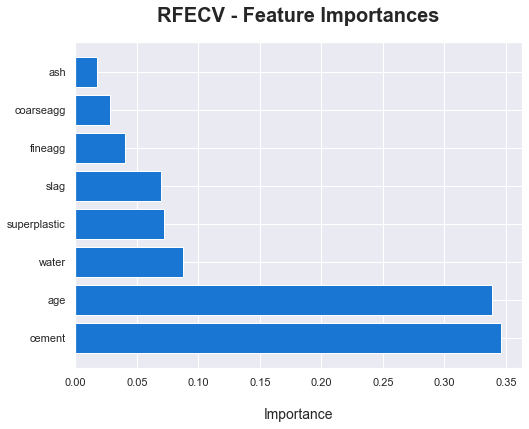

In [190]:
# plot the graph for identifying feature importance of the RFECV model

dset = pd.DataFrame()
dset['attr'] = Xtrain.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(8,6))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

### <font color='brown'>1.3.7 Conclusion</font>

<font color='blue'>
    
1. The polynomial model with additional interaction terms performs better than the multi linear model with R2 score of <b><u>77%</u></b> over <b><u>73%</u></b> for the linear model.
<br>
<br>
2. The Lasso linear regression indicates that the Ash and Coarseagg features may not add any value to the model and has made the coefficients of these features as Zero. 
<br>
<br>
3. The RFECV model includes all the features as optimal features and doesn't eliminate any of the features.
<br>
<br>
4. Although, the RFECV model does indicate that Coarseagg and Ash are of least importance in model building.
<br>
<br>
5. A new dataset may be prepared from the Xtrain and Xtest dataset by dropping Coarseagg and ash and then validating the performance score. 
<br>
<br>
6. The RFECV model is based on a random forest regression algorithm, which seems to give the R2 value as <b><u>83%</u></b>. This may lead us to conclude that other algorithms may give better prediction than the linear or polynomial algorithms used.
<br>
<br>
7. The difference in train performance metrics and test performance metrics of the RFECV model with base model as random forest regression shows that R2 for train data is 98% and that of test data is 83%. This clearly indicates an over-fit and the reason being, the algorithm is using all the features. 
<br>
<br>
8. Ash and Coarseagg may be considered as noise in this data set. 

<font color='brown'><b>1.3.7.1 Drop Ash and coarseagg from the train and test set</b></font>

In [197]:
# drop the columns ash and coarseagg from Xtrain to eliminate noise
Xtrain_featured = Xtrain.drop(['ash','coarseagg'], axis=1)

# drop the columns ash and coarseagg from Xtest to eliminate noise
Xtest_featured = Xtest.drop(['ash','coarseagg'], axis=1)

In [199]:
Xtrain_featured.shape, Xtest_featured.shape

((703, 6), (302, 6))

<font color='brown'><b>1.3.7.2 Find the performance metrics after feature engineering for multi linear regression model</b></font>

In [393]:
# linear regression model on the dataset that is feature engineered

lin_reg.fit(Xtrain_featured, ytrain) # train model on feature engineered dataset

print('The R2 of linear regression on train data:',lin_reg.score(Xtrain_featured,ytrain)*100.0)
print()
print('The R2 of linear regression on test data:',lin_reg.score(Xtest_featured,ytest)*100.0)

The R2 of linear regression on train data: 71.98432895752796

The R2 of linear regression on test data: 73.14443727443575


<font color='brown'><b>1.3.7.3 Find the performance metrics after feature engineering for polynomial model</b></font>

In [395]:
# train the polynomial model of degree=2 

poly = PolynomialFeatures(degree=2,interaction_only=True) # quadratic model
X_train2 = poly.fit_transform(Xtrain_featured) # transform train set
X_test2 = poly.fit_transform(Xtest_featured) # transform test set

poly_clf = LinearRegression()
poly_clf.fit(X_train2, y_train)


LinearRegression()

In [396]:
# predict dependent variable based on the transformed dataset

predict_poly = poly_clf.predict(X_test2)

In [397]:
# compare the performance of the model on train data and test data

print('R2 of train data:',poly_clf.score(X_train2,y_train)*100.0)
print()
print('R2 of test data:', poly_clf.score(X_test2, y_test)*100.0)

R2 of train data: 76.97883381402055

R2 of test data: 73.18874424856905


##  Deliverable – 2:  Creating the model and tuning it

### 2.1. Model Building (15 marks)
<br>
Algorithms that you think will be suitable for this project (at least 3 algorithms).
Use Kfold Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. 

<font color='blue'>
1. Select Decision Tree Regressor, Random Forest Regressor, Support vector Machine Regressor as the additional algorithms for this project
<br>
2. Train the model on Xtrain and Xtrain_featured dataset to find the performance metrics score
<br>
3. Test the model on Xtest and Xtest_featured dataset to find the performance metrics score
<br>
4. Evaluate the performance score on the two datasets to decide if feature engineering is helping the model to predict better. 
<br>
5. Create a dataframe to capture the performance metrics score
<br>
6. Use KFold cross validation to evaluate the model performance for deployment into production

<font color='brown'><b>2.1.1 Build models for Non-feature engineered dataset</b></font>

In [269]:
# import DecisionTreeRegressor, RandomForestRegressor, Support vector regressor(SVR)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [270]:
# define the machine learning models using the 3 algorithms

clf_pruned = DecisionTreeRegressor(criterion='mse',random_state=42,max_depth=7, min_samples_leaf=5)
rfr = RandomForestRegressor(n_estimators=100, criterion='mse',random_state=42)
svr = SVR(C=1.0, epsilon=0.2)

In [398]:
# list of models used for the project
model_list = [clf_pruned,rfr,svr] 

# metrics for the regression models evaluation
RMSE = []
MSE = []
MAE = []
rSQD = []

# iterating the model list in the for loop to train the model and calculate the performance metrics 
for index, value in enumerate(model_list):
    value.fit(Xtrain,ytrain)
    MAE.append(mean_absolute_error(ytest,value.predict(Xtest)))
    MSE.append(mean_squared_error(ytest,value.predict(Xtest)))
    RMSE.append(np.sqrt(mean_squared_error(ytest,value.predict(Xtest))))
    rSQD.append(r2_score(ytest,value.predict(Xtest))*100.0)

In [399]:
# create a list of the model names
modelNames = ['Decision Tree Pruned',
              'Random Forest regressor',
              'Support Vector Regressor(SVR)']

# create a dataframe to capture the metrics for base model of the 3 algorithms
Metrics_BaseModel = pd.DataFrame({'Model':modelNames,
                                  'MAE':MAE,
                                  'MSE':MSE,
                                  'RMSE':RMSE,
                                  'R2':rSQD})

In [400]:
Metrics_BaseModel 

,Model,MAE,MSE,RMSE,R2
0,Decision Tree Pruned,6.041397,62.702039,7.918462,73.017020
1,Random Forest regressor,4.613017,37.281104,6.105825,83.956578
2,Support Vector Regressor(SVR),6.352895,67.013876,8.186200,71.161479


<font color='brown'><b>2.1.2 Build models for feature engineered dataset</b></font>

In [401]:
# list of models used for the project
model_list = [clf_pruned,rfr,svr] 

# metrics for the base models
RMSE = []
MSE = []
MAE = []
rSQD = []

# iterating the model list in the for loop to train the model and calculate the metrics 
# use the feature engineered dataset
for index, value in enumerate(model_list):
    value.fit(Xtrain_featured,ytrain)
    MAE.append(mean_absolute_error(ytest,value.predict(Xtest_featured)))
    MSE.append(mean_squared_error(ytest,value.predict(Xtest_featured)))
    RMSE.append(np.sqrt(mean_squared_error(ytest,value.predict(Xtest_featured))))
    rSQD.append(r2_score(ytest,value.predict(Xtest_featured))*100.0)

In [402]:
# create a list of the model names
modelNames = ['Decision Tree Pruned',
              'Random Forest regressor',
              'Support Vector Regressor(SVR)']

# create a dataframe to capture the metrics for base model
Metrics_BaseModel_Engineered = pd.DataFrame({'Model':modelNames,
                                  'MAE':MAE,
                                  'MSE':MSE,
                                  'RMSE':RMSE,
                                  'R2':rSQD})

In [403]:
# create a dataframe to capture the metrics for base model
Metrics_BaseModel_Engineered

,Model,MAE,MSE,RMSE,R2
0,Decision Tree Pruned,6.391222,68.543996,8.279130,70.503012
1,Random Forest regressor,4.716127,38.394378,6.196320,83.477495
2,Support Vector Regressor(SVR),6.058277,60.382353,7.770608,74.015265


<font color='brown'><b>2.1.3 Combine the performance metrics dataframes in a single dataframe</b></font>

In [404]:
# combine the dataframe from the earlier analysis with the dataframe created 
# from the metrics of the feature engineered set. 

dfModelComparison_1 = pd.concat([dfModelComparison,Metrics_BaseModel_Engineered])

dfModelComparison_1

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,5.979673,60.458818,7.775527,73.982360
0,Polynomial Model,5.656287,53.329369,7.302696,77.050423
0,Decision Tree Pruned,6.391222,68.543996,8.279130,70.503012
1,Random Forest regressor,4.716127,38.394378,6.196320,83.477495
2,Support Vector Regressor(SVR),6.058277,60.382353,7.770608,74.015265


<font color='red'> <b>Used the feature engineered dataset as it shows less over-fit on the training data.</b>

<font color='brown'><b>2.1.4 KFold Cross validation</b></font>

In [229]:
# use KFold algorithm to validate the performance of models in production

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score # score to validate the model

[0.83822436 0.75686282 0.7493587  0.74596358 0.77201279 0.85228403
 0.77075474 0.73302342 0.80278983 0.79555026]

For the ML model DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, random_state=42) R2 is 78.168 and STD is 3.786

AxesSubplot(0.125,0.125;0.775x0.755)
[0.89498304 0.85627339 0.86593048 0.88025986 0.91156005 0.90399775
 0.90332596 0.92529311 0.89897509 0.90372731]

For the ML model RandomForestRegressor(random_state=42) R2 is 89.443 and STD is 1.998

AxesSubplot(0.125,0.125;0.775x0.755)
[0.64020626 0.57807176 0.6542477  0.70444316 0.75771039 0.76816386
 0.74543155 0.76519525 0.71650445 0.71668346]

For the ML model SVR(epsilon=0.2) R2 is 70.467 and STD is 5.931

AxesSubplot(0.125,0.125;0.775x0.755)


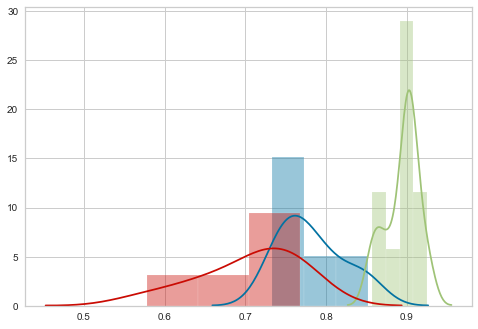

In [291]:
# list of models used for the project
model_list = [clf_pruned,rfr,svr] 

kfold = KFold(n_splits=10, random_state=7)

# use the training data for validation
# separate validation set was not created because we are using KFold CV validation method
for index, value in enumerate(model_list):
    results = cross_val_score(value, Xtrain_featured, ytrain, cv=kfold, scoring='r2')
    print(results)
    print()
    print("For the ML model {} R2 is {:.3f} and STD is {:.3f}"
          .format(value,results.mean()*100.0, results.std()*100.0) )
    print()
    print(sns.distplot(results,kde=True)) # distplot of the results of each model


<font color='brown'><b>2.1.5 Conclusion</b></font>

<font color='blue'>
1. The best model to deploy in production will be the model that can give an accuracy score at 95% confidence level. 
<br>
2. The 95% confidence level is a range which is 2 standard deviations from the mean on either side. 
<br>
3. For the Decision Tree Regressor model the 95% confidence range is: <b><u>70.6% - 85.7%</u></b>
<br>
   For the Random Forest Regressor model the 95% confidence range is : <b><u>85.4% - 93.4%</u></b>
<br>
   For the Support Vector Regressor model the 95% confidence range is : <b><u>58.6% - 82.3%</u></b>
<br>
4. Since the <b><u>Decision Tree Regressor model and the Random Forest Regressor model</u></b> gave the best accuracy score, we will tune these ML models to get better accuracy
<br> 
5. Of the 3 models, only Support Vector Regressor performance metrics on test data (Real world data) falls within it's 95% confidence level. That means, the Decision Tree Regressor and Random Forest Regressor can be tuned to get a better score for test data. 


### 2.2. Tuning Technique (15 marks)
<br>
Techniques employed to squeeze that extra performance out of the model without making it over fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above.

<font color='blue'>
1. We have to create a generalization model that performs well on test data or production set
<br>
2. Tuning of hyperparameters is one method to squeeze the last mile out of the model. Hyperparameter tuning is done on the train data and never on the test data. Another reason why the scaling was done separately for both datasets to avoid any data leak. 
<br>
3. Randomized search cross validation will be used to find the hyperparameters.

<font color='brown'><b>2.2.1 Tune Decision Tree Regressor Model</b></font>

In [329]:
# get function random search cv from scikit-learn

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
# base model of the decision tree regressor used

clf_pruned = DecisionTreeRegressor(criterion='mse',random_state=42,max_depth=7, min_samples_leaf=5)

In [292]:
# get hyperparameters of the decision tree algorithm

clf_pruned.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [328]:
# specify parameters and distributions to sample from

decisiontree_param_grid = {'criterion': ['mse','mae','friedman_mse'],
                          'max_depth': [3, None],
                          'min_samples_split': sp_randint(2, 11),
                          'min_samples_leaf': sp_randint(1, 11),
                          'max_features': sp_randint(1, 11)}


In [330]:
# run randomized search with cross validation with total iterations 10


decisiontree_randomCV = RandomizedSearchCV(clf_pruned,
                                           param_distributions=decisiontree_param_grid,
                                          n_iter = 10, scoring='r2')

In [331]:
# train the model with feature engineered train data

decisiontree_randomCV.fit(Xtrain_featured,ytrain)

RandomizedSearchCV(estimator=DecisionTreeRegressor(max_depth=7,
                                                   min_samples_leaf=5,
                                                   random_state=42),
                   param_distributions={'criterion': ['mse', 'mae',
                                                      'friedman_mse'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff9039023d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff902c50750>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff902c50b50>},
                   scoring='r2')

In [334]:
# get the best parameters after training the model

decisiontree_randomCV.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [335]:
# best parameters for estimation of performance metrics

decisiontree_randomCV.best_estimator_

DecisionTreeRegressor(max_features=3, min_samples_leaf=3, min_samples_split=7,
                      random_state=42)

In [338]:
# build decision tree model by tuning hyperparameters

dt_tuned = DecisionTreeRegressor(max_features=3, 
                                 min_samples_leaf=3, 
                                 min_samples_split=7,
                                 random_state=42)

dt_tuned.fit(Xtrain_featured,ytrain)

DecisionTreeRegressor(max_features=3, min_samples_leaf=3, min_samples_split=7,
                      random_state=42)

<font color='brown'><b>2.2.2 Tune Random Forest Regressor Model</b></font>

In [ ]:
# base model of the random forest regressor used

rfr = RandomForestRegressor(n_estimators=100, criterion='mse',random_state=42)

In [293]:
# get hyperparameters of the random forest regressor algorithm

rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [306]:
# specify parameters and distributions to sample from

randomforest_param_grid = {"n_estimators": [50,100,200,500],
                           "max_depth": [3, None],
                           "max_features": sp_randint(1, 11),
                           "min_samples_split": sp_randint(2, 11),
                           "min_samples_leaf": sp_randint(1, 11),
                           "bootstrap": [True, False],
                           "criterion": ["mse", "mae"]}

In [307]:
# run randomized search with cross validation with total iterations 10

randomforest_randomCV = RandomizedSearchCV(rfr,
                                           param_distributions=randomforest_param_grid,
                                          n_iter = 10, scoring='r2')

In [308]:
# train the model with feature engineered train data

randomforest_randomCV.fit(Xtrain_featured, ytrain)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff900abc090>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff902c01f50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff900abc390>,
                                        'n_estimators': [50, 100, 200, 500]},
                   scoring='r2')

In [309]:
# get the best parameters after training the model

randomforest_randomCV.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [315]:
# best parameters for estimation of performance metrics

randomforest_randomCV.best_estimator_

RandomForestRegressor(max_features=3, min_samples_leaf=4, min_samples_split=8,
                      random_state=42)

In [320]:
# build random forest model by tuning hyperparameters

rfr_tuned = RandomForestRegressor(max_features=3, min_samples_leaf=4, min_samples_split=8,
                      random_state=42)

rfr_tuned.fit(Xtrain_featured,ytrain)

RandomForestRegressor(max_features=3, min_samples_leaf=4, min_samples_split=8,
                      random_state=42)

<font color='brown'><b>2.2.3 Calculate performance metrics of tuned models</b></font>

In [405]:
# models after hyperparameter tuning
model_list = [dt_tuned, rfr_tuned]

# metrics for the base models
RMSE = []
MSE = []
MAE = []
rSQD = []

# iterating the model list in the for loop to train the model and calculate the metrics 
# use the feature engineered dataset
for index, value in enumerate(model_list):
    value.fit(Xtrain_featured,ytrain)
    MAE.append(mean_absolute_error(ytest,value.predict(Xtest_featured)))
    MSE.append(mean_squared_error(ytest,value.predict(Xtest_featured)))
    RMSE.append(np.sqrt(mean_squared_error(ytest,value.predict(Xtest_featured))))
    rSQD.append(r2_score(ytest,value.predict(Xtest_featured))*100.0)

In [406]:
# create a list of the model names
modelNames = ['Tuned Decision Tree',
              'Tuned Random Forest regressor']

# create a dataframe to capture the metrics for base model
Metrics_BaseModel_Tuned = pd.DataFrame({'Model':modelNames,
                                  'MAE':MAE,
                                  'MSE':MSE,
                                  'RMSE':RMSE,
                                  'R2':rSQD})

In [407]:
Metrics_BaseModel_Tuned

,Model,MAE,MSE,RMSE,R2
0,Tuned Decision Tree,6.371001,70.313392,8.385308,69.741577
1,Tuned Random Forest regressor,4.749882,36.312762,6.026007,84.373291


<font color='brown'><b>2.2.4 Final Data frame of performance metrics</b></font>

In [408]:
# combine the dataframe from the earlier analysis with the dataframe created 
# from the performance metrics after tuning hyperparameters

dfModelComparison_final = pd.concat([dfModelComparison_1,Metrics_BaseModel_Tuned])

dfModelComparison_final.reset_index(inplace = True) # reset the index of the dataframe
dfModelComparison_final.drop('index', axis=1, inplace = True) # drop the column named index

dfModelComparison_final # print resulting dataframe

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,5.979673,60.458818,7.775527,73.982360
1,Polynomial Model,5.656287,53.329369,7.302696,77.050423
2,Decision Tree Pruned,6.391222,68.543996,8.279130,70.503012
3,Random Forest regressor,4.716127,38.394378,6.196320,83.477495
4,Support Vector Regressor(SVR),6.058277,60.382353,7.770608,74.015265
5,Tuned Decision Tree,6.371001,70.313392,8.385308,69.741577
6,Tuned Random Forest regressor,4.749882,36.312762,6.026007,84.373291


<font color='brown'><b>2.2.4 Conclusion</b></font>

<font color='blue'>
1. From the final performance metrics dataframe it can be concluded that the best model for this dataset is the <b><u>Tuned Random Forest Regressor model</u></b> which gives a R2 score of <b><u>84.4%</u></b>
<br>
<br>
2. For the Random Forest Regressor model the 95% confidence range is : <b><u>85.4% - 93.4%</u></b> from the train data. Which means, the model on the test data or the real world data falls within the predicted performance range of the train data. 
<br>
<br>
<font color='red'><b><u>The Machine learning model is a good model to deploy in production</u></b>